## PCA Implemenration

Covariance Clearly Explained! https://www.youtube.com/watch?v=TPcAnExkWwQ&t=7s <br>
Principal Component Analysis (PCA) https://www.youtube.com/watch?v=g-Hb26agBFg

### A. Principal Component Analysis (PCA)
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

If a vector $v$ is an eigenvector of matrix $\mathbf{A}$, it must be expressed as follows:

\begin{equation}
\begin{split}
\mathbf{A} v = \lambda v    
\end{split}. \tag{1}
\end{equation} 

where λ is the eigenvalue corresponding to the eigenvector $v$, and a set of eigenvectors of a matrix is  a set of orthogonal vectors.

Let’s figure out how to find them. By subtracting off the $\lambda v$ from both sides and then factoring out the vector, we see the above is equivalent to:

\begin{equation}
\begin{split}
(\mathbf{A} - \lambda I)v = 0   
\end{split}. \tag{2}
\end{equation} 

For this equation to happen, $(\mathbf{A} - \lambda I)$ must compress some direction down to zero. Hence, it is not invertible, and thus, the determinant is zero. 
Thus, we can find the eigenvalues for what $\lambda$ is det$(\mathbf{A} - \lambda I) = 0$. 
Once we find the eigenvalues, we can solve $\mathbf{A} v = \lambda v$ to find the associated eigenvector(s).

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from numpy.linalg import eig
A = np.array([[0, 2], 
              [2, 3]])
L,V = eig(A)
print('E-value:', L)
print('E-vector', V)

E-value: [-1.  4.]
E-vector [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


#### Eigen Decomposition
If there exists $\Bbb{Q}$ is the square n × n matrix whose ith column is the eigenvector of $\mathbf{A}$, and 
$\Lambda$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues, $\Lambda_{ii} = \lambda_i$. 
\begin{equation}
\begin{split}
\mathbf{A} \Bbb{Q} &= \Bbb{Q} \Lambda \\    
\mathbf{A} &= \Bbb{Q} \Lambda \Bbb{Q}^{-1}
\end{split}\tag{3}
\end{equation} 

Let's analyze the formula of eigenvalue decomposition. 

The decomposed $\Lambda$  matrix is a diagonal matrix, and the eigenvalues $\Bbb{Q}$ ranged from large to small. 
The eigenvectors corresponding to these eigenvalues ​​describe the transformation direction of this matrix (from major changes to minor changes).

When the matrix is ​​high-dimensional, then this matrix is ​​a linear transformation in a high-dimensional space. 

* Steps of PCA
##### Step 1: Find mean and normalization 
\begin{equation}
E(X) = \bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.     \tag{4}
\end{equation} 
\begin{equation}
\text{Var}(X,X) = E(X-E(X))E(X-E(X))^T = \sigma^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_i-\bar{x})^2.     \tag{5}
\end{equation}

##### Step 2: Derive the covariance matrix
\begin{equation}
\text{Cov}(X,Y) = E[(X-E(X))(Y-E(Y))^T] = \frac{1}{n-1} \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}).     \tag{6}
\end{equation}

##### Step 3: Find the eigenvalues $\Lambda$ and eigenvectors $\Bbb{Q}$  of the covariance matrix.
\begin{equation}
\text{Cov}(X,Y) = \Bbb{Q} \Lambda \Bbb{Q}^{-1}  \tag{7}
\end{equation} 

##### Step 4: Select k principle components and the corresponding vectors from $\Bbb{Q}$ with the largest eigenvalues from $\Lambda$ Lambda
\begin{equation}
K_{k \times p} := \text{top k of } \Bbb{Q} \tag{8}
\end{equation} 

#### Step 5: Transpose to dimension-reduced data 
\begin{equation}
X_{pca} = (K_{k \times p} \cdot X_{1 \times p}^T)^T  \tag{9}
\end{equation} 
where $X_{pca}$ is the dimension-reduced X in dimensions $ 1 \times k$

#### A.1 Step by step of PCA 

In [4]:
x1 = np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1])
x2 = np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])

matrix([[ 0.69,  0.49],
        [-1.31, -1.21],
        [ 0.39,  0.99],
        [ 0.09,  0.29],
        [ 1.29,  1.09],
        [ 0.49,  0.79],
        [ 0.19, -0.31],
        [-0.81, -0.81],
        [-0.31, -0.31],
        [-0.71, -1.01]])

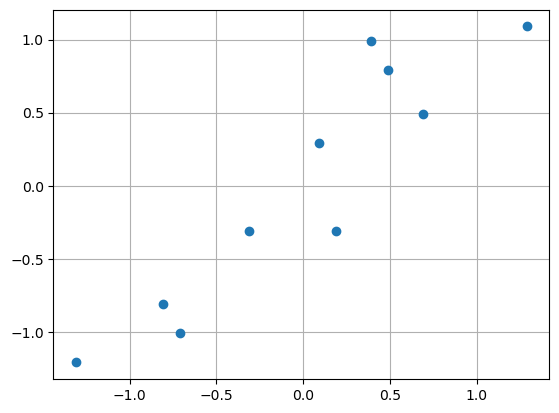

In [5]:
# Step 1: find mean and normalization
mean_x1 = np.mean(x1)
mean_x2 = np.mean(x2)
scaled_x1 = x1-mean_x1
scaled_x2 = x2-mean_x2
data = np.matrix([[scaled_x1[i],scaled_x2[i]] for i in range(len(scaled_x1))])
plt.plot(scaled_x1,scaled_x2,'o'); plt.grid()   
data

In [6]:
# Step 2: find Covariance Matrix
cov = np.cov(scaled_x1,scaled_x2)
cov

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [7]:
# Step 3:  find the eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(cov)
eig_vec

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

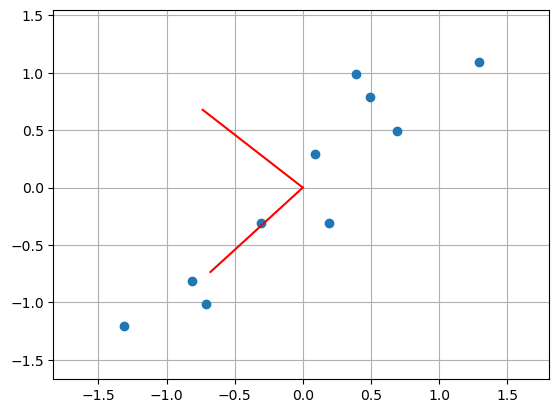

In [8]:
plt.plot(scaled_x1,scaled_x2,'o',)
xmin ,xmax = scaled_x1.min(), scaled_x1.max()
ymin, ymax = scaled_x2.min(), scaled_x2.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)
plt.plot([eig_vec[:,0][0],0],[eig_vec[:,0][1],0],color='red')
plt.plot([eig_vec[:,1][0],0],[eig_vec[:,1][1],0],color='red')
plt.grid()

* Red line is the eigenvectors：
    * The eigenvectors are orthogonal, and PCA actually uses this feature of the eigenvectors to reconstruct a new space system.
    * The eigenvector represents the pattern (mode) of the data, for example, one represents the trend that y increases with the increase of x, while the other represents the change in the data. 
    * Therefore, the naming of eigenvectors is very scientific, and he represents the characteristics of the matrix.

In [9]:
new_data = np.transpose(np.dot(eig_vec,np.transpose(data)))

In [10]:
# Step 4: select principle components 
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
eig_pairs.sort(reverse=True)
eig_pairs

[(1.2840277121727839, array([-0.6778734 , -0.73517866])),
 (0.04908339893832736, array([-0.73517866,  0.6778734 ]))]

In [12]:
feature = eig_pairs[0][1]
feature

array([-0.6778734 , -0.73517866])

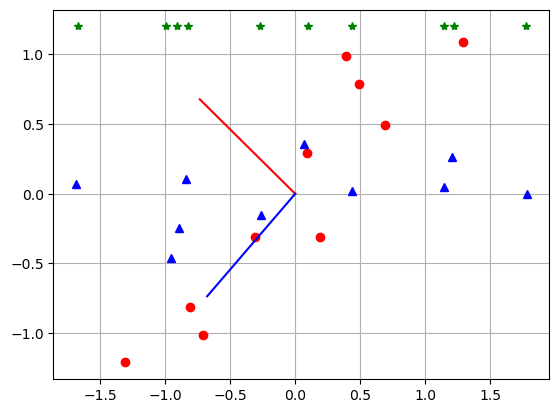

In [11]:
# Step 5: transpose to dimension reduced data 
new_data_reduced = np.transpose(np.dot(feature, np.transpose(data)))
plt.plot(scaled_a,scaled_b,'o',color='red')
plt.plot([eig_vec[:,0][0],0],[eig_vec[:,0][1],0],color='red')
plt.plot([eig_vec[:,1][0],0],[eig_vec[:,1][1],0],color='blue')
plt.plot(new_data[:,0],new_data[:,1],'^',color='blue')
plt.plot(new_data_reduced[:,0],[1.2]*10,'*',color='green')
plt.grid()

* The green five-pointed star is the one-dimensional data obtained after PCA processing. 
    * In order to compare with the previous figure, their height is positioned at 1.2. 
    * In fact, it is the point formed after the red dot is projected onto the blue line. 
    * This is PCA, which forms a new coordinate system by selecting the characteristic root vector, and then projects the data to this new coordinate system to achieve dimensionality reduction on the basis of losing as little information as possible.

#### A.2 Applying Data Transformations

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [18]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [19]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


#### A.3 Applying PCA to the cancer dataset for visualization

In [20]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_train_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_train_scaled)
print(f"Original shape: {X_train_scaled.shape}")
print(f"Reduced shape: {X_pca.shape}")

Original shape: (426, 30)
Reduced shape: (426, 2)


In [21]:
print(f"PCA component shape: {pca.components_.shape}")
print(f"PCA components:\n{pca.components_}")
print(f"PCA explained variance: {pca.explained_variance_}")

PCA component shape: (2, 30)
PCA components:
[[ 0.23930239  0.10354721  0.24797388  0.21377689  0.09933482  0.2748351
   0.28876603  0.30894746  0.10265993  0.03320697  0.11925712 -0.00187594
   0.11536802  0.10411046 -0.0056335   0.1261396   0.06298615  0.12094464
   0.00331199  0.04473482  0.25504464  0.119609    0.25580451  0.20365939
   0.11528325  0.22428933  0.25106628  0.35974727  0.10324028  0.14506661]
 [-0.24736414 -0.05486978 -0.22718782 -0.22111099  0.17415475  0.22954833
   0.0857034  -0.02417431  0.18248383  0.38934423 -0.07794594  0.05737135
  -0.06355344 -0.09270456  0.12540501  0.21282375  0.09232029  0.09698864
   0.16212291  0.17795433 -0.24228156 -0.04367602 -0.21094466 -0.19979535
   0.19017343  0.19679659  0.13274728  0.01784164  0.13769792  0.37912184]]
PCA explained variance: [0.36342526 0.11760423]


In [18]:
np.sum(pca.explained_variance_)

0.481029492727338

Text(0, 0.5, 'Principal components')

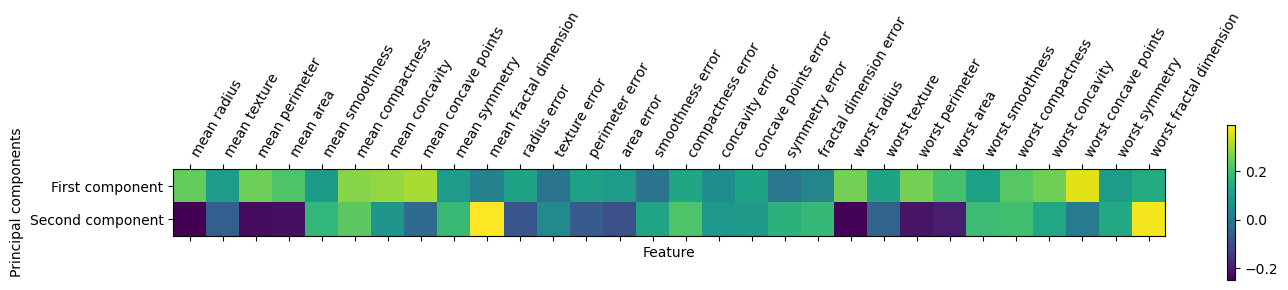

In [19]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")